# Embeddings and Neural Networks

Alipio Jorge

date: 1/6/2021

# Textual data representation

- Suppose we have a dataset with **movie reviews** and we want to learn how to classify them as positive or negative.
  - This is a pure **binary classification** problem
  - The data is **textual**
  - For most methods we have to represent text as **vectors**
  
  
- The conventional **representation** of text is **TF-IDF**.
  - High **dimensionality**
  - **Sparse** representation
  - **Crisp** representation of terms
      - e.g. *car* and *vehicle*


# Textual data representation

- Conventional representation
  - Vector Model
    - one text, one vector
  - Bag of Words (BoW)
    - **order** is not considered
  - Weighting **schemes**
    - Binary, Text Frequency (TF), TF-IDF (inverse document frequency), BM25, ...
    
    
- Despite limitations, this approach has proved **very useful** in practice
  - Information retrieval, information extraction, text clustering and classification,...
  - Hard to beat in simple tasks
  - **Keep it** in the toolbox


# Textual data representation

- The state of the art forms for represeting text are based on **embeddings**
  - Each term is represented by a **low dimension** numerical vector
  - A **reasonable** representation can be obtained in **different ways**
    - e.g. matrix factorization, PCA
  - But it can be **learned** by a **neural network**
  - Resulting in a **Neural Language Model**
    - a neural network that turns words into outputs


# A toy movie review example

- Can we learn the **semantics** of the word?
  - words close to each other have similar semantics



In [250]:
from keras.models import Sequential
import numpy as np

In [251]:
pos = ["good film","great film","nice film","good movie","great movie","nice movie"]
neg = ["bad film","dreadful film","horrible film","bad movie","dreadful movie","horrible movie"]

# Transforming input text

- Tokenize
  - identify words/terms
  - each will have a numeric code


In [252]:
import keras.preprocessing as prep

data=pos+neg

#.fit_text_tokenizer(data)

y_data = np.array([1]*len(pos)+[0]*len(neg))

tokenizer = prep.text.Tokenizer()
tokenizer.fit_on_texts(data)

tokenizer.word_index['<pad>'] = 0
tokenizer.index_word[0] = '<pad>'

In [253]:
tokenizer.word_index

{'film': 1,
 'movie': 2,
 'good': 3,
 'great': 4,
 'nice': 5,
 'bad': 6,
 'dreadful': 7,
 'horrible': 8,
 '<pad>': 0}

In [254]:
tokenizer.word_counts

OrderedDict([('good', 2),
             ('film', 6),
             ('great', 2),
             ('nice', 2),
             ('movie', 6),
             ('bad', 2),
             ('dreadful', 2),
             ('horrible', 2)])

# Classical representations

- Representing text the **old way**
  - still often useful
  - we do not need this for this example


In [255]:
# representing text "the old way"
tokenizer.texts_to_matrix( data, mode = "binary")

array([[0., 1., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 1., 0.]])

In [256]:
# representing text "the old way"
tokenizer.texts_to_matrix( data, mode = "tfidf")

array([[0.        , 0.99852883, 0.        , 1.60943791, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.99852883, 0.        , 0.        , 1.60943791,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.99852883, 0.        , 0.        , 0.        ,
        1.60943791, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.99852883, 1.60943791, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.99852883, 0.        , 1.60943791,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.99852883, 0.        , 0.        ,
        1.60943791, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.99852883, 0.        , 0.        , 0.        ,
        0.        , 1.60943791, 0.        , 0.        , 0.        ],
       [0.        , 0.99852883, 0.       

In [257]:
# representing text "the old way"
tokenizer.texts_to_matrix( data, mode = "freq") #tf

array([[0. , 0.5, 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.5, 0. , 0. , 0.5, 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.5, 0. , 0. , 0. , 0.5, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.5, 0. , 0.5, 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.5, 0. , 0. , 0.5, 0. , 0. , 0. , 0. ],
       [0. , 0.5, 0. , 0. , 0. , 0. , 0.5, 0. , 0. , 0. ],
       [0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0. ],
       [0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. ],
       [0. , 0. , 0.5, 0. , 0. , 0. , 0.5, 0. , 0. , 0. ],
       [0. , 0. , 0.5, 0. , 0. , 0. , 0. , 0.5, 0. , 0. ],
       [0. , 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0.5, 0. ]])

# Classical representations

- Obtaining token sequences


In [258]:
vocab_size = len(tokenizer.word_index)
dseq = tokenizer.texts_to_sequences(data)
dseq

[[3, 1],
 [4, 1],
 [5, 1],
 [3, 2],
 [4, 2],
 [5, 2],
 [6, 1],
 [7, 1],
 [8, 1],
 [6, 2],
 [7, 2],
 [8, 2]]

In [259]:
dseq_pad = prep.sequence.pad_sequences(dseq,maxlen = 3, padding = "post")
dseq_pad

array([[3, 1, 0],
       [4, 1, 0],
       [5, 1, 0],
       [3, 2, 0],
       [4, 2, 0],
       [5, 2, 0],
       [6, 1, 0],
       [7, 1, 0],
       [8, 1, 0],
       [6, 2, 0],
       [7, 2, 0],
       [8, 2, 0]], dtype=int32)

# The embedding layer

- Looking at one single **untrained** embedding layer
  - This is a kind of dense layer
  - number of **inputs** is size of vocabulary $n$
    - **one hot encoding**
  - number of **outputs** is embeddings dimension $k$
  - number of **weights** is $n \times k$


In [260]:
from keras.layers import Embedding

model = Sequential()

model.add( 
  Embedding(input_dim = vocab_size+1, output_dim = 2)
)
model.summary()


Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_19 (Embedding)     (None, None, 2)           20        
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


# Plot initial embeddings

- We have chosen 2 dimensions
  - not realistic for practical problems
  - great for plotting
  - words are inititially placed randomly


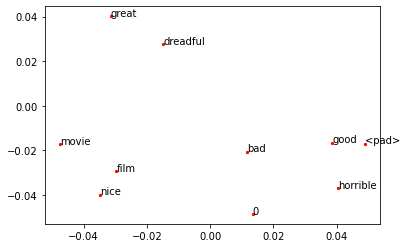

In [261]:
import matplotlib.pyplot as plt

def plot_embs(model):
    embs = model.get_weights()[0]
    xembs = embs[:,0]
    yembs = embs[:,1]
    tembs = ['0']
    tembs.extend(list(tokenizer.word_index.keys()))
    plt.scatter(xembs,yembs,s=5,color='red')
    for i in range(len(tembs)):
      plt.text(xembs[i], yembs[i], tembs[i])
    #  row.names(embs)<-tembs
    embs

embs = plot_embs(model)
embs

# Build a full network

- We will have
  - an **embedding** layer
    - representation learning
  - a **pooling** layer
    - obtains segment representations
    - averages
  - an **output** dense layer
    - learning how to classify


In [262]:
from keras.layers import GlobalAvgPool1D
from keras.layers import Dense

model = Sequential()

model.add(Embedding(input_dim = vocab_size+1, output_dim = 2))
model.add(GlobalAvgPool1D()) 
model.add(Dense(units = 1, activation = "sigmoid"))

model.compile(
  optimizer = 'adam',
  loss = 'binary_crossentropy',
  metrics = ['accuracy']
)

model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_20 (Embedding)     (None, None, 2)           20        
_________________________________________________________________
global_average_pooling1d_10  (None, 2)                 0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 3         
Total params: 23
Trainable params: 23
Non-trainable params: 0
_________________________________________________________________


# Train

- Just run the fit function


Epoch 1/20
6/6 [==============================] - 0s 13ms/step - loss: 0.6879 - accuracy: 0.8333 - val_loss: 0.6876 - val_accuracy: 0.8333
Epoch 2/20
6/6 [==============================] - 0s 6ms/step - loss: 0.6876 - accuracy: 0.8333 - val_loss: 0.6872 - val_accuracy: 0.8333
Epoch 3/20
6/6 [==============================] - 0s 5ms/step - loss: 0.6870 - accuracy: 0.8333 - val_loss: 0.6867 - val_accuracy: 0.9167
Epoch 4/20
6/6 [==============================] - 0s 5ms/step - loss: 0.6865 - accuracy: 0.9167 - val_loss: 0.6861 - val_accuracy: 0.9167
Epoch 5/20
6/6 [==============================] - 0s 6ms/step - loss: 0.6860 - accuracy: 1.0000 - val_loss: 0.6856 - val_accuracy: 1.0000
Epoch 6/20
6/6 [==============================] - 0s 6ms/step - loss: 0.6854 - accuracy: 1.0000 - val_loss: 0.6850 - val_accuracy: 1.0000
Epoch 7/20
6/6 [==============================] - 0s 5ms/step - loss: 0.6849 - accuracy: 1.0000 - val_loss: 0.6844 - val_accuracy: 1.0000
Epoch 8/20
6/6 [=================

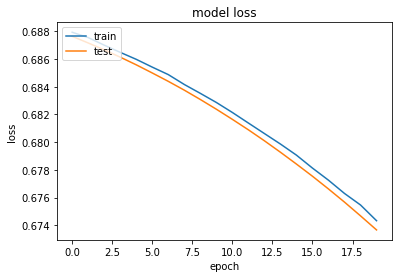

In [265]:
history = model.fit(
  dseq_pad,
  y_data,
  epochs = 20,
  batch_size = 2,
  validation_data = (dseq_pad, y_data),
  verbose=1
)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Plot the word representation

- Plot the embeddings after learning
  - words with similar meaning tend to be close
  - this very simple example learned how to **represent** words
  - discovering **semantics** from raw text (and classes)


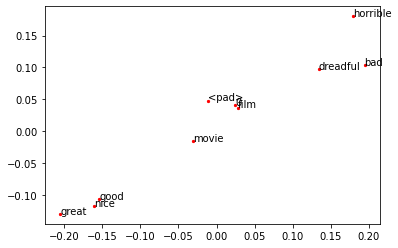

In [266]:
embs = plot_embs(model)

# Learning embeddings

- Embeddings can also be learned from **raw text**
- One **possible** way of finding the word vectors
  - take the (sparse) matrix of joint probabilities
  - use SVD to **factorize** the matrix (e.g. 100 factors)
  - use one of the factor matrices as word embeddings
- You can also try to factorize the TF-IDF matrix
- **In general**:
  - **compress** the word representations
  - PCA is a possibility
  
- Note
  - calculating word joint probabilities is a heavy step
  - So is factorization



# Using Neural Networks

- train a binary classifier for **determining if one given word is in the context** of another
- input is **free text**, which is then tokenized
- each "example" is a **pair of words**
- use **negative sampling** for negative examples
- one embedding layer, one dot product layer, one dense layer
- the model **learns embeddings** that make words in the same context have similar representations
- words that do not co-ocur but have similar contexts will have similar representations as well


# The movie review classification example

- In this example:
  - We use a `IMDB` dataset from `keras`
  - Each example is a review (text) with label (0,1)
  - We use a keras embeddings layer
  - Each word (term) is first represented by an integer (index)
  - The embeddings layer learns a 16d representation for each word
  


# The movie review classification example

- Load data and index table. Use only the 10000 most frequent terms


In [211]:
from keras.datasets.imdb import *

imdb = load_data(num_words = 10000) 

# find imdb.py and change np.load(path) in line 86 
# to np.load(path, allow_pickle=True)

(train_data, train_labels), (test_data, test_labels) = imdb
word_index = get_word_index()

# The movie review classification example

- See one training example


In [212]:
train_data[0][0:20]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25]

# The movie review classification example

- Reviews have different lengths


In [200]:
len(train_data[1]), len(train_data[2])


(189, 141)

# The movie review classification example

- How to decode tokenized reviews

In [213]:
# Reverse the word index to obtain a dict mapping indices to words
inverted_word_index = dict((i, word) for (word, i) in word_index.items())

# Decode the sequence with index 'idx' in the dataset
def decoded_sequence(idx):
    return " ".join(inverted_word_index[i] for i in train_data[idx])

In [214]:
decoded_sequence(3)

"the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have t

# The movie review classification example

Prepare the data in sequences of max 256. If shorter, missing values are **padded** with zeros


In [215]:
train_data_sq = prep.sequence.pad_sequences(
  train_data,
  padding = "post",
  maxlen = 256
)

- Similarly for the test data

In [217]:
test_data_sq = prep.sequence.pad_sequences(
  test_data,
  padding = "post",
  maxlen = 256
)

# The movie review classification example

- How to represent one text with one single embeddings vector?
  - Pooling layers **aggregate** signals from previous layers
      - *average*, *maximum*
  - Example for text with **7 words and 5d embedding**
      - input case has size 7 ("the dog is chasing the cat!")
      - after embedding layer text is represented by 7*5 matrix
        - plus any padding if used
      - We *average* each of the 5 dimensions and obtain **one vector** of size 5
      - This is **global average pooling** for 1d data



# The movie review classification example

- Define the network


In [232]:
vocab_size = 10000

model = Sequential()
model.add(Embedding(input_dim = vocab_size, output_dim = 32)) 
model.add(GlobalAvgPool1D())
model.add(Dense(units = 16, activation = "relu"))
model.add(Dense(units = 1, activation = "sigmoid"))

model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_16 (Embedding)     (None, None, 32)          320000    
_________________________________________________________________
global_average_pooling1d_8 ( (None, 32)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 17        
Total params: 320,545
Trainable params: 320,545
Non-trainable params: 0
_________________________________________________________________



# The movie review classification example

- Define the hyper parameters


In [233]:
model.compile(
  optimizer = 'adam',
  loss = 'binary_crossentropy',
  metrics = ['accuracy']
)


# The movie review classification example

- Define validation data and learn



In [228]:
partial_y_train.shape

(15000,)

Epoch 1/40
30/30 [==============================] - 2s 25ms/step - loss: 0.6926 - accuracy: 0.5218 - val_loss: 0.6894 - val_accuracy: 0.5428
Epoch 2/40
30/30 [==============================] - 0s 14ms/step - loss: 0.6861 - accuracy: 0.6353 - val_loss: 0.6775 - val_accuracy: 0.6925
Epoch 3/40
30/30 [==============================] - 0s 14ms/step - loss: 0.6699 - accuracy: 0.7211 - val_loss: 0.6541 - val_accuracy: 0.7052
Epoch 4/40
30/30 [==============================] - 0s 14ms/step - loss: 0.6398 - accuracy: 0.7446 - val_loss: 0.6160 - val_accuracy: 0.7690
Epoch 5/40
30/30 [==============================] - 0s 14ms/step - loss: 0.5959 - accuracy: 0.7982 - val_loss: 0.5679 - val_accuracy: 0.7955
Epoch 6/40
30/30 [==============================] - 1s 17ms/step - loss: 0.5396 - accuracy: 0.8205 - val_loss: 0.5089 - val_accuracy: 0.8257
Epoch 7/40
30/30 [==============================] - 1s 17ms/step - loss: 0.4759 - accuracy: 0.8485 - val_loss: 0.4575 - val_accuracy: 0.8399
Epoch 8/40
30

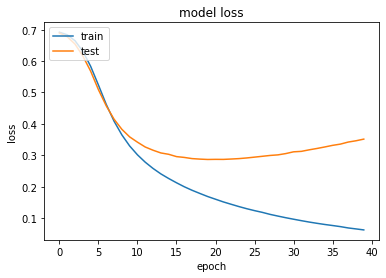

In [234]:
x_val = train_data_sq[0:10000,:]
partial_x_train = train_data_sq[10000:train_data_sq.shape[0],:]

y_val = train_labels[0:10000]
partial_y_train = train_labels[10000:len(train_labels)]

history = model.fit(
  partial_x_train,
  partial_y_train,
  epochs = 40,
  batch_size = 512,
  validation_data = (x_val, y_val),
  verbose=1
)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# The movie review classification example

- Get results on test data



In [235]:
results = model.evaluate(test_data_sq, test_labels)
results

782/782 [==============================] - 1s 943us/step - loss: 0.3751 - accuracy: 0.8660


[0.37510398030281067, 0.8659600019454956]

# Word2Vec

- "The **Distributional Hypothesis** is that words that occur in the same contexts tend to have similar meanings (Harris, 1954)""
  - word embeddings can be built with this in mind


- Examples:
  - the cat is my favourite pet
  - my dog is a great pet
  
(https://aclweb.org/aclwiki/Distributional_Hypothesis)


# Word2Vec

- How to **learn** word embeddings using context?
  - **predict** the co-occurrence of words


  
# CBOW and Skipgram

- Continuous bag of words
  - takes context as input and tries to predict central word
  
  
- Skipgram
  - take central word as input and tries to predict words in context
  


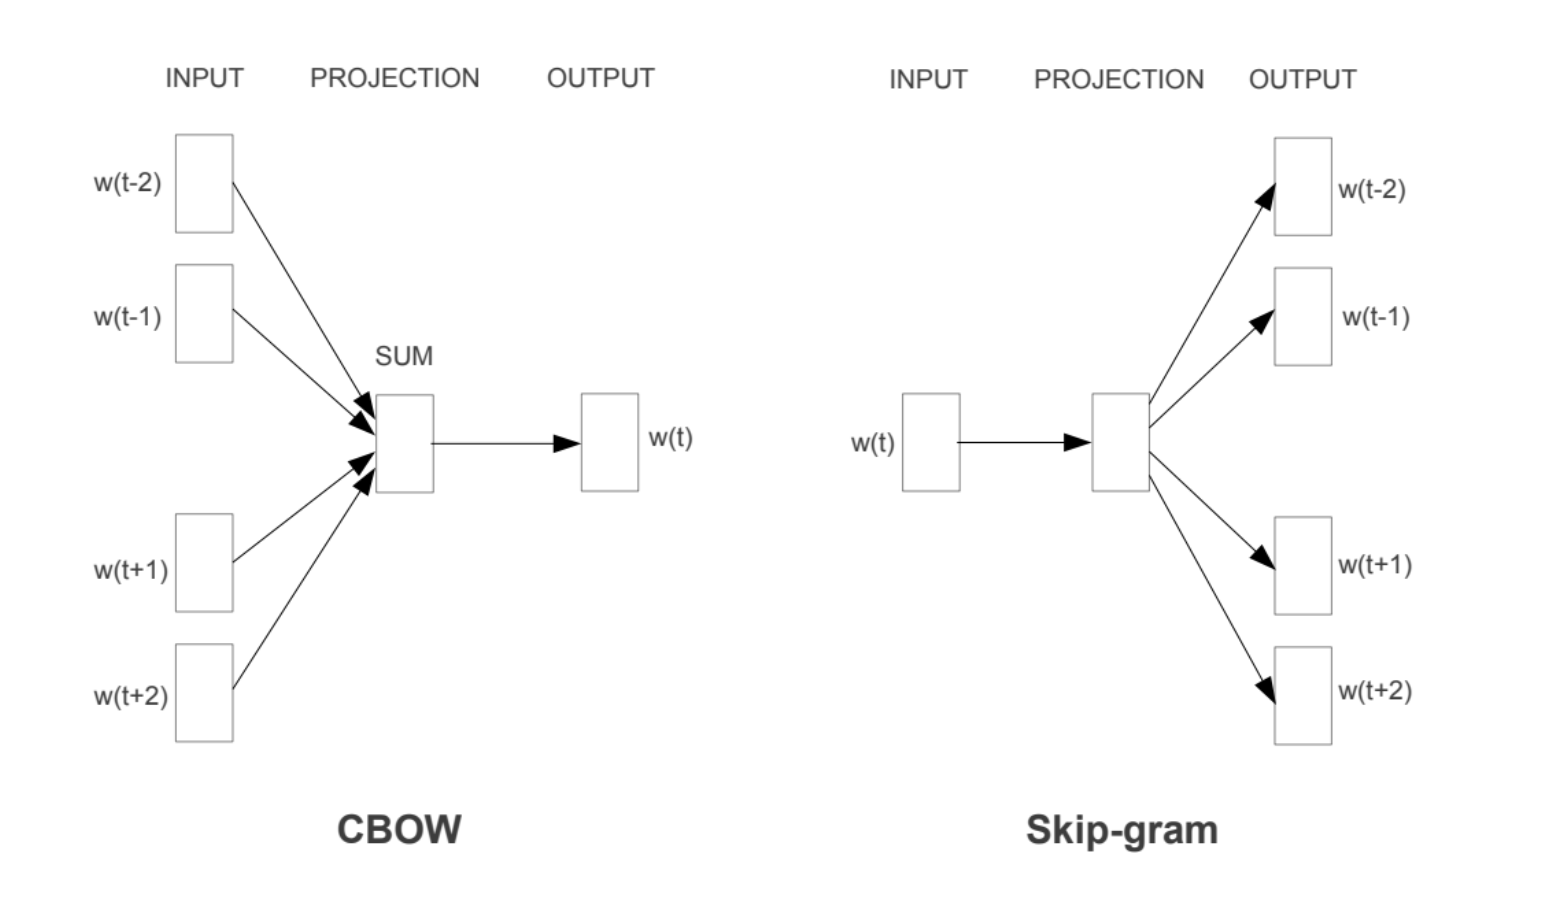

In [239]:
from IPython.display import Image
Image("imagens/12-cbow-skipgram-image.png")

# Skipgram

- Process
  - segment text in windows
  - calculate the probability of two words occurring together
- This is done without Neural Networks

(https://cbail.github.io/textasdata/word2vec/rmarkdown/word2vec.html)


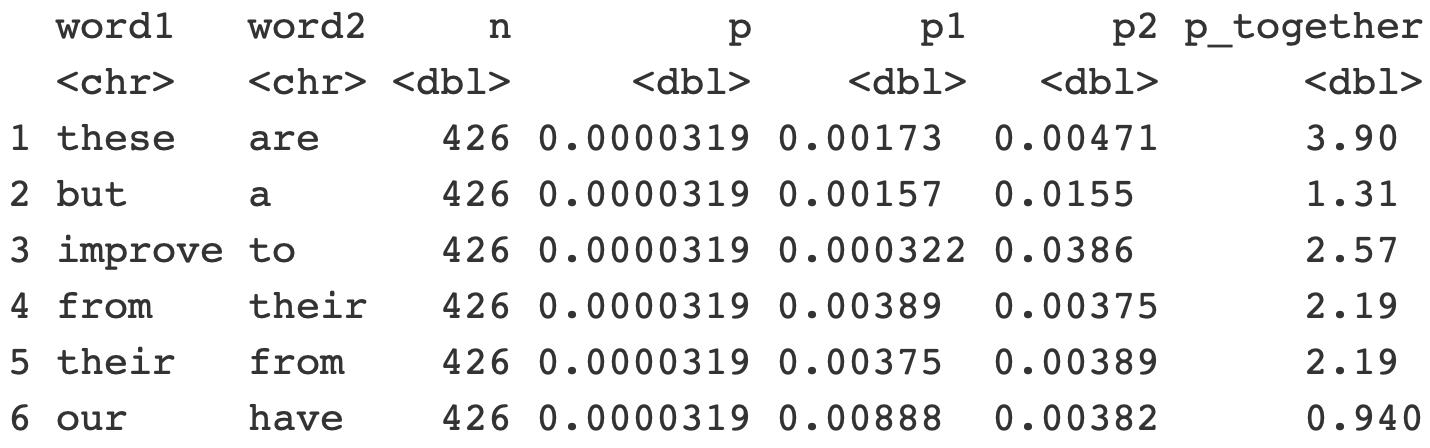

In [240]:
from IPython.display import Image
Image("imagens/12-skipgram-probs.png")

# Skipgram

- We can find the most likely words for a given one (e.g. "Trump")

(https://cbail.github.io/textasdata/word2vec/rmarkdown/word2vec.html)


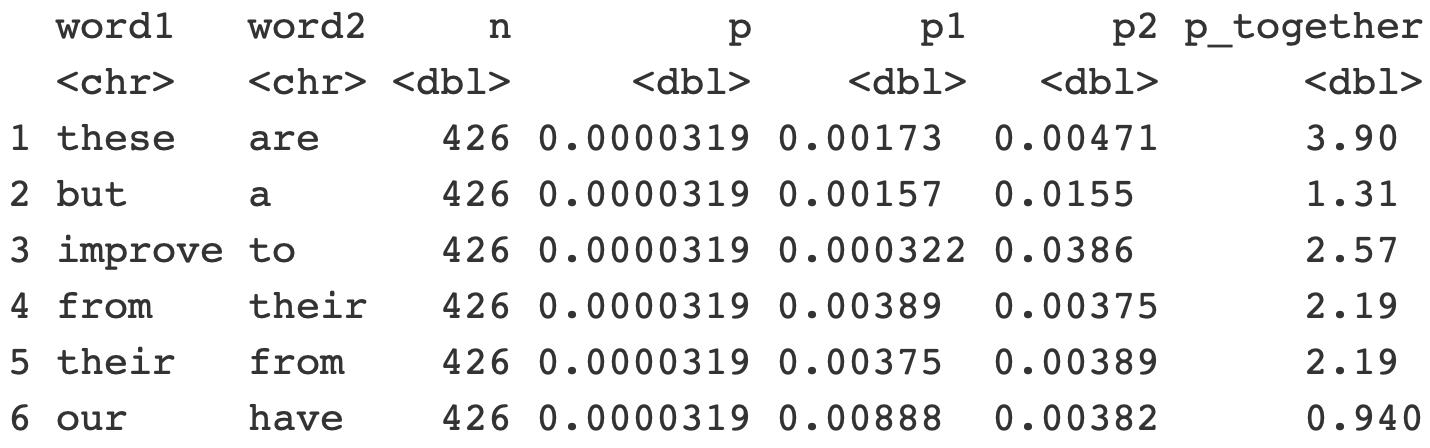

In [240]:
from IPython.display import Image
Image("imagens/12-skipgram-table-trump.png")

# Skipgram

$$queen = king + (woman-man)$$




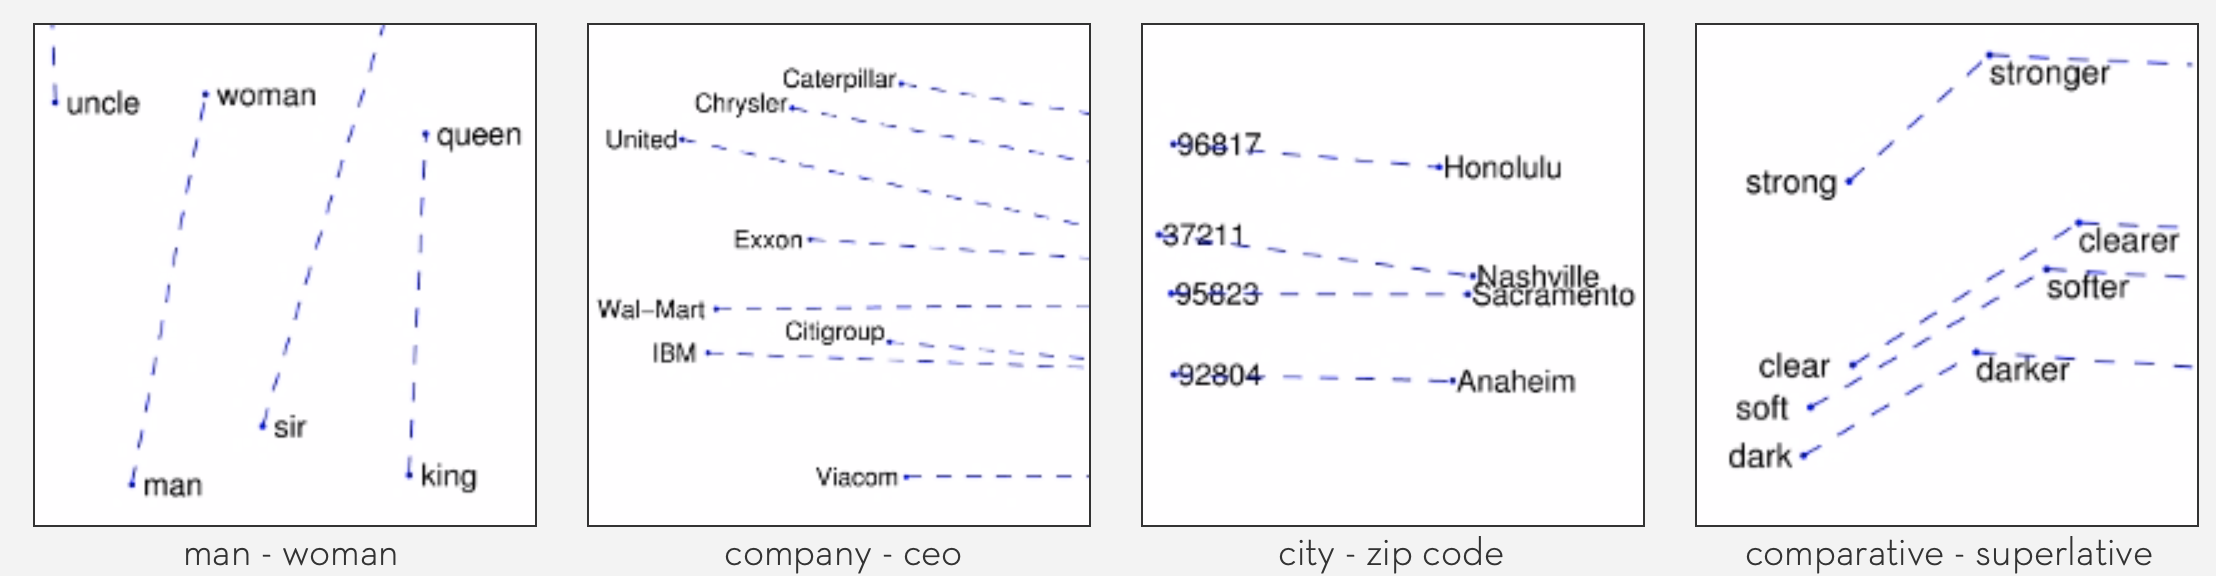

In [242]:
from IPython.display import Image
Image("imagens/12-glove-pairs.png")

# Using Neural Networks

- Data scientists can use different models and/or pre-trained embeddings.

- Popular Neural language models:
  - BERT: (https://towardsdatascience.com/bert-explained-state-of-the-art-language-model-for-nlp-f8b21a9b6270)
  - GloVe: (https://nlp.stanford.edu/projects/glove/)



# Activity

1. Change the simple examples to study the effect of having more terms and noisy terms.
2. Use the embedding vectors and apply an SVM to the task of text classification (start with a small example)




# Bibliography

**Keras online documentation**
(https://keras.rstudio.com/index.html)

**Machine Learning Mastery**, Jason Brownlee
(https://machinelearningmastery.com)

**Deep Learning, NLP, and Representations**
(http://colah.github.io/posts/2014-07-NLP-RNNs-Representations/)a